In [19]:
from datetime import datetime
import glob
import math
import pandas as pd
import csv

from scipy.stats import kendalltau

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
def calc_tau(row):
    return kendalltau([ord(c) for c in row['mapped_cipher_alphabet']], [ord(c) for c in row['target_cipher_alphabet']])[0]

In [32]:
test_ylim = None
for f in glob.glob("*test*.csv"):
    df = pd.read_csv(f)
    y1 = df.fitness.max()
    y0 = df.fitness.min()
    print(y0, y1, f)
    if test_ylim:
        test_ylim = (min(test_ylim[0], y0), max(test_ylim[1], y1))
    else:
        test_ylim = (y0, y1)
print(test_ylim)
test_ylim = (math.floor((test_ylim[0] - 100) / 200) * 200, math.ceil((test_ylim[1] + 100) / 200) * 200)
test_ylim               

-11168.92114676162 -6794.348261349826 test.csv
(-11168.92114676162, -6794.348261349826)


(-11400, -6600)

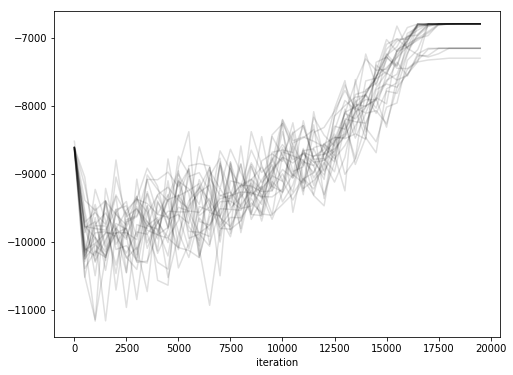

In [33]:
for f in glob.glob("*test*.csv"):
    df = pd.read_csv(f).set_index(['worker', 'iteration']).sort_index()
    workers = list(sorted(set(df.index.get_level_values(0))))
    fig, ax = plt.subplots()
    for w in workers:
        df.loc[w].fitness.plot(ax=ax, color='#00000020', ylim=test_ylim, figsize=(8,6))
    fig.savefig(f + '.png')

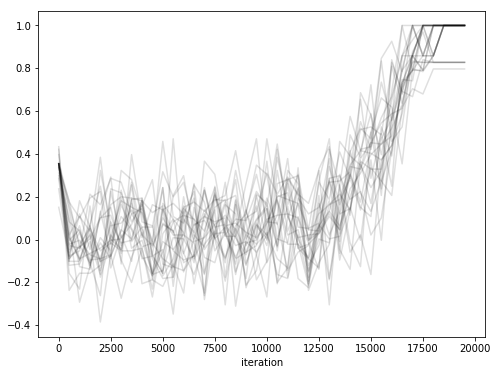

In [34]:
for f in glob.glob("*test*.csv"):
    df = pd.read_csv(f).set_index(['worker', 'iteration']).sort_index()
    workers = list(sorted(set(df.index.get_level_values(0))))
    df['tau'] = df.apply(calc_tau, axis=1)
    fig, ax = plt.subplots()
    for w in workers:
        df.loc[w].tau.plot(ax=ax, color='#00000020', 
#                                ylim=test_ylim, 
                               figsize=(8,6))
    fig.savefig(f + 'tau.png')

In [31]:
df

fitness              plain_alphabet  \
worker iteration                                             
0      0          -8628.102747  etoainhsrdlumwycfgpbvkxjqz   
       500       -10015.192455  etoainhsrdlumwycfgpbvkxjqz   
       1000       -9840.232586  etoainhsrdlumwycfgpbvkxjqz   
       1500       -9646.643722  etoainhsrdlumwycfgpbvkxjqz   
       2000       -9708.403249  etoainhsrdlumwycfgpbvkxjqz   
       2500       -9591.345828  etoainhsrdlumwycfgpbvkxjqz   
       3000       -9274.661200  etoainhsrdlumwycfgpbvkxjqz   
       3500       -9762.290517  etoainhsrdlumwycfgpbvkxjqz   
       4000       -9566.802526  etoainhsrdlumwycfgpbvkxjqz   
       4500       -9709.704262  etoainhsrdlumwycfgpbvkxjqz   
       5000       -9645.595659  etoainhsrdlumwycfgpbvkxjqz   
       5500       -9595.573049  etoainhsrdlumwycfgpbvkxjqz   
       6000      -10134.537884  etoainhsrdlumwycfgpbvkxjqz   
       6500       -9741.092822  etoainhsrdlumwycfgpbvkxjqz   
       7000       -9511.269200  etoainhsrdlumwycfgpbvkxjqz   
       7500       -9832.513040  etoainhsrdlumwycfgpbvkxjqz   
       8000       -9107.286677  etoainhsrdlumwycfgpbvkxjqz   
       8500       -9257.228364  etoainhsrdlumwycfgpbvkxjqz   
       9000       -9566.660006  etoainhsrdlumwycfgpbvkxjqz   
       9500       -9567.994771  etoainhsrdlumwycfgpbvkxjqz   
       10000      -9100.590756  etoainhsrdlumwycfgpbvkxjqz   
       10500      -9476.196668  etoainhsrdlumwycfgpbvkxjqz   
       11000      -9393.930253  etoainhsrdlumwycfgpbvkxjqz   
       11500      -8412.054539  etoainhsrdlumwycfgpbvkxjqz   
       12000      -9373.262246  etoainhsrdlumwycfgpbvkxjqz   
       12500      -8940.366387  etoainhsrdlumwycfgpbvkxjqz   
       13000      -8557.340778  etoainhsrdlumwycfgpbvkxjqz   
       13500      -8171.637333  etoainhsrdlumwycfgpbvkxjqz   
       14000      -8450.637319  etoainhsrdlumwycfgpbvkxjqz   
       14500      -7445.172069  etoainhsrdlumwycfgpbvkxjqz   
...                        ...                         ...   
23     5000       -9476.690080  etoainhsrdlumwycfgpbvkxjqz   
       5500       -9314.062738  etoainhsrdlumwycfgpbvkxjqz   
       6000       -9495.030032  etoainhsrdlumwycfgpbvkxjqz   
       6500       -9937.475777  etoainhsrdlumwycfgpbvkxjqz   
       7000       -9005.034593  etoainhsrdlumwycfgpbvkxjqz   
       7500       -9224.941732  etoainhsrdlumwycfgpbvkxjqz   
       8000       -9285.943028  etoainhsrdlumwycfgpbvkxjqz   
       8500       -9349.181897  etoainhsrdlumwycfgpbvkxjqz   
       9000       -8709.705712  etoainhsrdlumwycfgpbvkxjqz   
       9500       -9526.938751  etoainhsrdlumwycfgpbvkxjqz   
       10000      -9799.421945  etoainhsrdlumwycfgpbvkxjqz   
       10500      -9138.124734  etoainhsrdlumwycfgpbvkxjqz   
       11000      -9208.530069  etoainhsrdlumwycfgpbvkxjqz   
       11500      -9207.441206  etoainhsrdlumwycfgpbvkxjqz   
       12000      -9081.219187  etoainhsrdlumwycfgpbvkxjqz   
       12500      -9155.632933  etoainhsrdlumwycfgpbvkxjqz   
       13000      -8696.404168  etoainhsrdlumwycfgpbvkxjqz   
       13500      -8430.207825  etoainhsrdlumwycfgpbvkxjqz   
       14000      -8881.481965  etoainhsrdlumwycfgpbvkxjqz   
       14500      -8391.704203  etoainhsrdlumwycfgpbvkxjqz   
       15000      -7948.660076  etoainhsrdlumwycfgpbvkxjqz   
       15500      -7583.543584  etoainhsrdlumwycfgpbvkxjqz   
       16000      -7177.945210  etoainhsrdlumwycfgpbvkxjqz   
       16500      -6943.209465  etoainhsrdlumwycfgpbvkxjqz   
       17000      -6814.331110  etoainhsrdlumwycfgpbvkxjqz   
       17500      -6819.395258  etoainhsrdlumwycfgpbvkxjqz   
       18000      -6812.903920  etoainhsrdlumwycfgpbvkxjqz   
       18500      -6807.957615  etoainhsrdlumwycfgpbvkxjqz   
       19000      -6807.957615  etoainhsrdlumwycfgpbvkxjqz   
       19500      -6807.957615  etoainhsrdlumwycfgpbvkxjqz   

                             cipher_alphabet      mapped_cipher_alphabet  \
worker iteration                        

# Find the graph limits

In [35]:
unigram_ylim = None
for f in glob.glob("*unigram*.csv"):
    df = pd.read_csv(f)
    y1 = df.fitness.max()
    y0 = df.fitness.min()
    print(y0, y1, f)
    if unigram_ylim:
        unigram_ylim = (min(unigram_ylim[0], y0), max(unigram_ylim[1], y1))
    else:
        unigram_ylim = (y0, y1)
unigram_ylim = (math.floor((unigram_ylim[0] - 100) / 200) * 200, math.ceil((unigram_ylim[1] + 100) / 200) * 200)
unigram_ylim               

-3869.307250218112 -2516.00992398943 sa-random-unigram-uniform.csv
-3839.3134735383337 -2516.00992398943 hillclimbing-random-unigram-uniform.csv


(-4000, -2400)

In [36]:
math.ceil(-3935.561885011543 / 200) * 200

-3800

In [37]:
trigram_ylim = None
for f in glob.glob("*trigram*.csv"):
    df = pd.read_csv(f)
    y1 = df.fitness.max()
    y0 = df.fitness.min()
    print(y0, y1, f)
    if trigram_ylim:
        trigram_ylim = (min(trigram_ylim[0], y0), max(trigram_ylim[1], y1))
    else:
        trigram_ylim = (y0, y1)
trigram_ylim = (math.floor((trigram_ylim[0] - 100) / 200) * 200, math.ceil((trigram_ylim[1] + 100) / 200) * 200)
trigram_ylim               

-12720.143220102082 -6794.348261349826 hillclimbing-random-trigram-uniform.csv
-8829.190767456532 -6794.348261349826 sa-given-trigram-uniform-50.csv
-12353.066243453513 -6794.348261349826 sa-random-trigram-uniform-50.csv
-8615.89272592576 -6794.348261349826 hillclimbing-given-trigram-uniform.csv
-11354.213044609856 -6794.348261349826 sa-given-trigram-gaussian.csv
-8615.89272592576 -6794.348261349826 hillclimbing-given-trigram-gaussian.csv
-12473.766416410037 -6794.348261349826 sa-random-trigram-uniform.csv
-8812.095650467198 -6794.348261349826 sa-given-trigram-gaussian-50.csv
-11135.426970803037 -6794.348261349826 sa-given-trigram-uniform.csv


(-13000, -6600)

In [38]:
# trace = pd.read_csv('hillclimbing-random-trigram-uniform.csv').set_index(['worker', 'iteration']).sort_index()
# workers = list(sorted(set(trace.index.get_level_values(0))))
# trace

In [39]:
# trace.fitness.plot()

In [40]:
# fig, ax = plt.subplots()
# for w in workers:
#     trace.loc[w].fitness.plot(ax=ax, color='#00000020', ylim=(-6500, -3300), figsize=(8,8))
# fig.savefig('test.png')

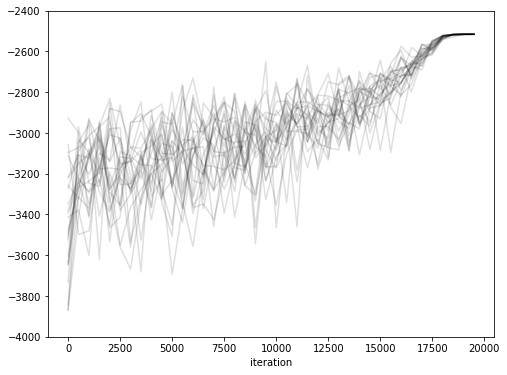

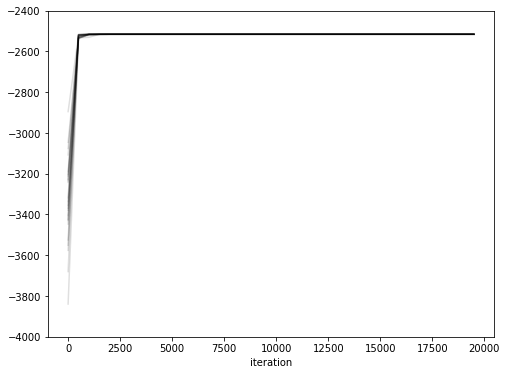

In [41]:
for f in glob.glob("*unigram*.csv"):
    df = pd.read_csv(f).set_index(['worker', 'iteration']).sort_index()
    workers = list(sorted(set(df.index.get_level_values(0))))
    fig, ax = plt.subplots()
    for w in workers:
        df.loc[w].fitness.plot(ax=ax, color='#00000020', ylim=unigram_ylim, figsize=(8,6))
    fig.savefig(f + '.png')

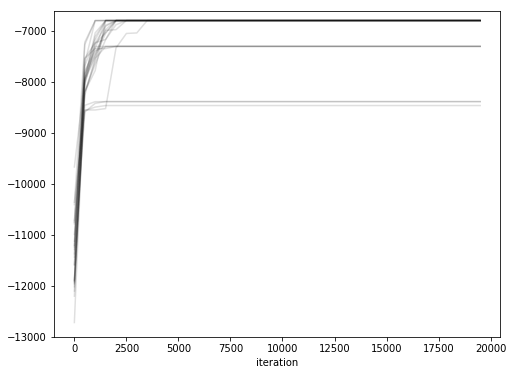

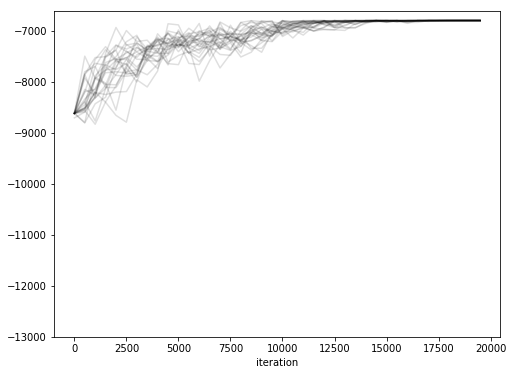

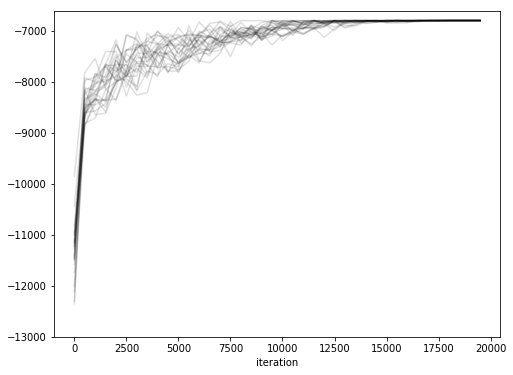

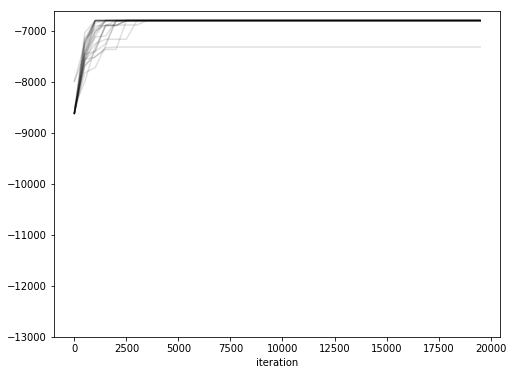

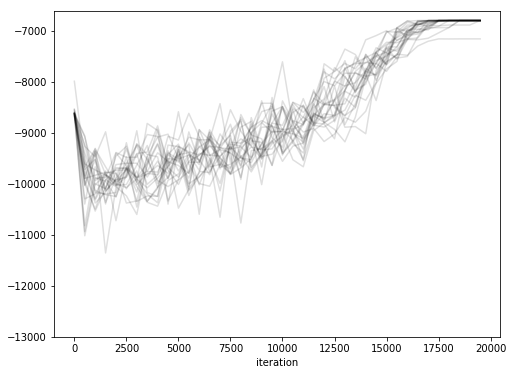

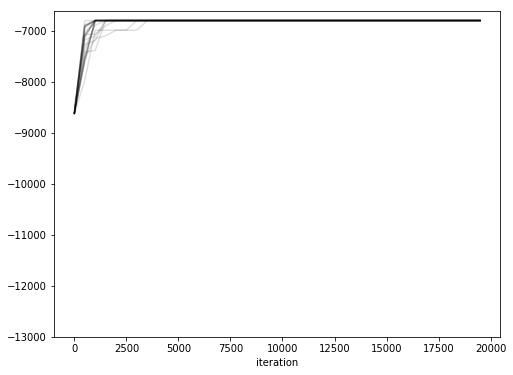

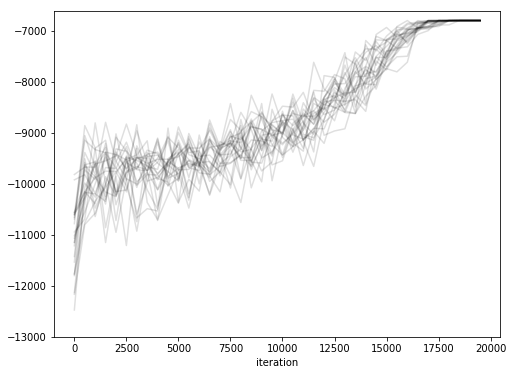

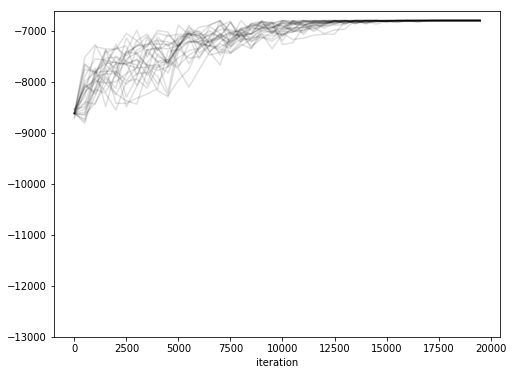

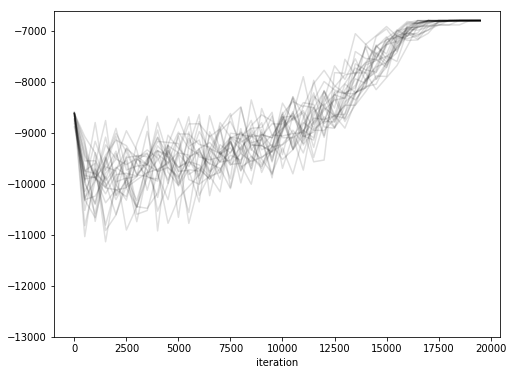

In [42]:
for f in glob.glob("*trigram*.csv"):
    df = pd.read_csv(f).set_index(['worker', 'iteration']).sort_index()
    workers = list(sorted(set(df.index.get_level_values(0))))
    fig, ax = plt.subplots()
    for w in workers:
        df.loc[w].fitness.plot(ax=ax, color='#00000020', ylim=trigram_ylim, figsize=(8,6))
    fig.savefig(f + '.png')

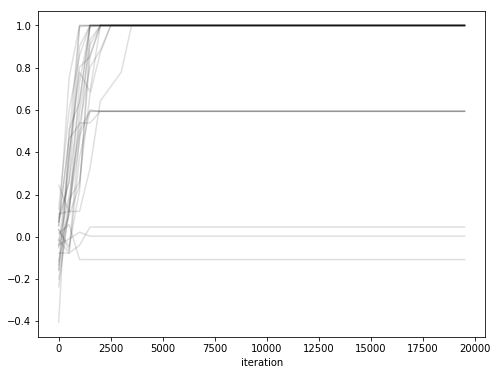

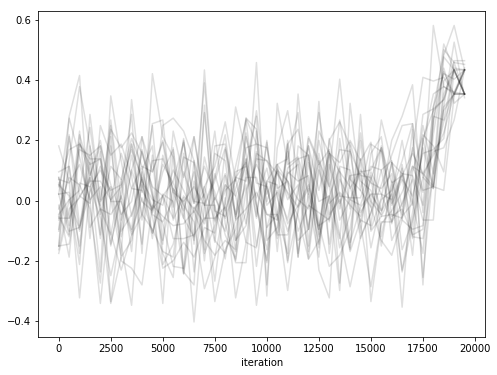

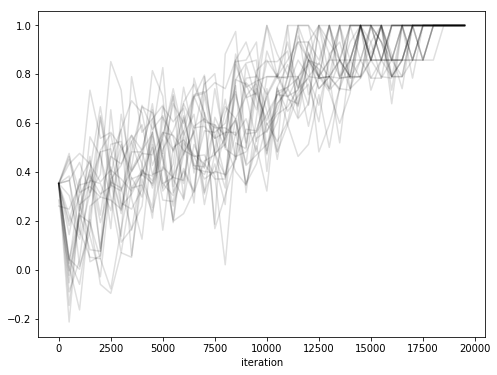

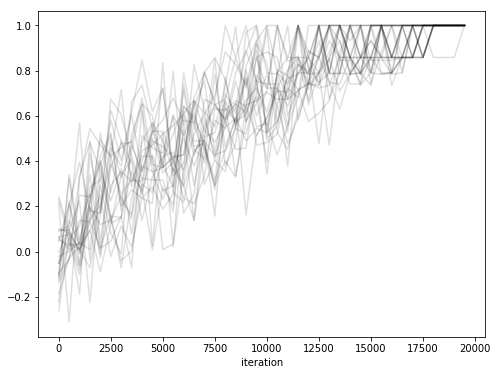

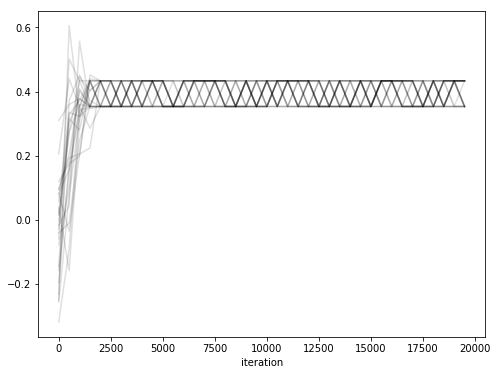

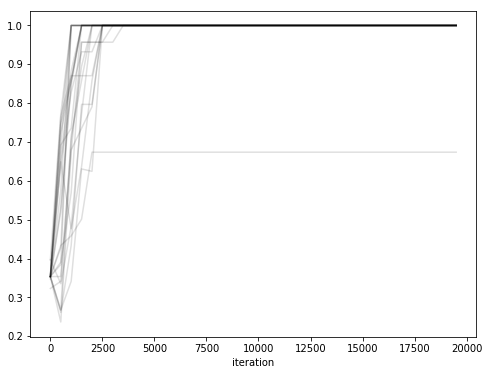

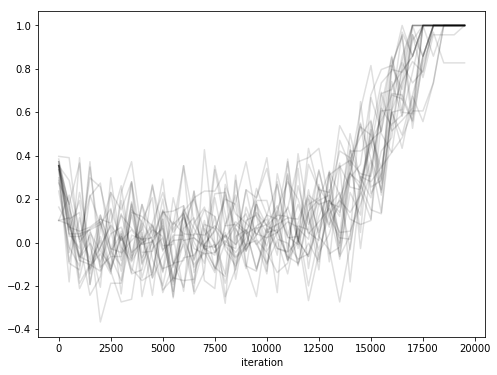

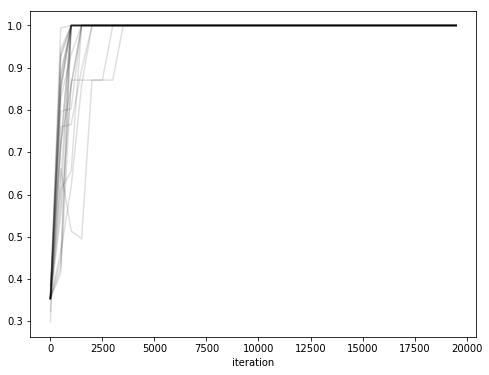

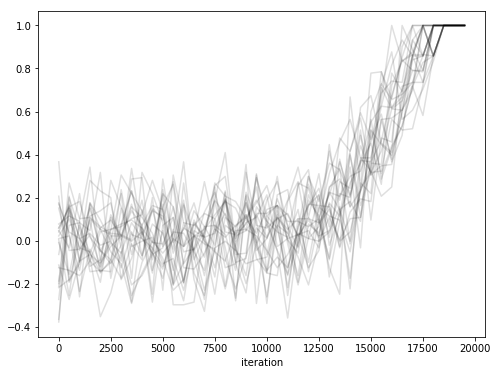

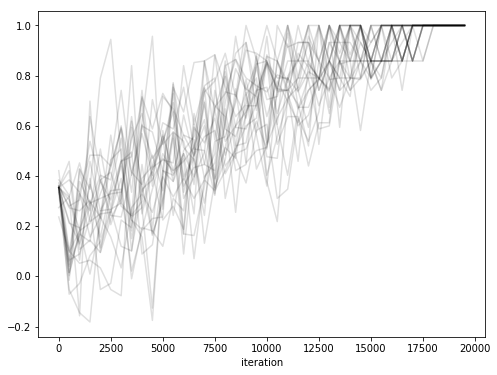

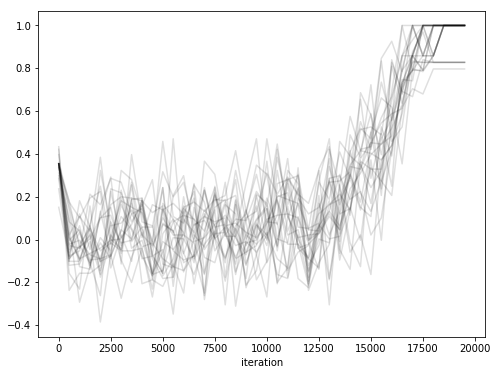

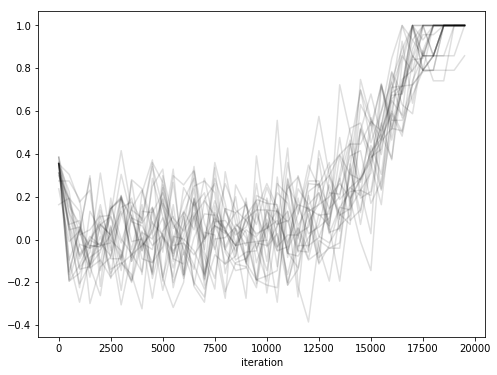

In [44]:
for f in glob.glob("*.csv"):
    df = pd.read_csv(f).set_index(['worker', 'iteration']).sort_index()
    workers = list(sorted(set(df.index.get_level_values(0))))
    df['tau'] = df.apply(calc_tau, axis=1)
    fig, ax = plt.subplots()
    for w in workers:
        df.loc[w].tau.plot(ax=ax, color='#00000020', 
#                                ylim=test_ylim, 
                               figsize=(8,6))
    fig.savefig(f + '.tau.png')